<a href="https://colab.research.google.com/github/nse4real/myrepo/blob/master/stylometry_test_result_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stylometry Test Result Evaluation

In [1]:
## Steps
#Read CSV file into the work space
# For each experiment, for each classifier, combine the splits by suming them and computing the average.
# For each classifier, compute the result for each experiment by summing them and averaging
# For each classifier, combine the result of each experiment and dispay
# Display precision and recall for author for each classifier
# Plot confusion matrices for each classifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  import needed libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import re, string, unicodedata
from tabulate import tabulate
import csv
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [4]:
path = os.getcwd() + "/drive/MyDrive/Colab Notebooks/"
print("The present working directory",path)

filenames = ['test-output.csv','test-pca-output.csv']

The present working directory /content/drive/MyDrive/Colab Notebooks/


## Evaluation of test-output.csv with grouping = 1

This file contains the results from testing the standard classifiers using the test dataset. The 5 experements are done making it 5 output per classifier.

In [5]:
# read the csv file
output_csv_df = pd.read_csv(path+"test-output.csv")
output_csv_df = output_csv_df.astype({"cm": str})
# print number df rows and columns
##print(output_csv_df.shape)
#print the column names
#print(output_csv_df.columns)
print(output_csv_df.info())
print()

output_csv_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experiment-Number  30 non-null     int64  
 1   Grouping-Number    30 non-null     object 
 2   Balance-Code       30 non-null     object 
 3   Classifier-Code    30 non-null     object 
 4   Accuracy           30 non-null     float64
 5   Total-F1           30 non-null     float64
 6   cm                 30 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB
None



,Experiment-Number,Grouping-Number,Balance-Code,Classifier-Code,Accuracy,Total-F1,cm
0,1,G-1,s,ann,0.295119,1.624324,"[[24, 47, 5, 13, 23, 37, 13, 88, 0, 9, 26, 18,..."
1,1,G-1,s,svm,0.311010,1.860313,"[[54, 31, 13, 15, 8, 28, 33, 61, 12, 21, 11, 1..."


In [6]:
def convert_cm_to_confusion_matrix(group_cm):
  #print(len(group_cm))
  cm_lists = []
  for cm in group_cm:
    #print(cm)
    num = []
    ch_list = []
    index = 0
    while index < len(cm):
      if cm[index].isdigit():
        num.append(cm[index])
      else:
        if len(num)>0:
          ch_list.append(int("".join(num)))
          num = []
      index+=1
    #print(ch_list)
    cm_lists.append(ch_list)
  final_cm = np.array(cm_lists)
  #print(final_cm)
  f = np.sum(final_cm, axis=0)
  #print(f)
  return f

## group the data by classifier-code and split-number
grouped_df = output_csv_df.groupby(['Experiment-Number','Classifier-Code','Grouping-Number','Balance-Code'])
experiments_result = {
    'Experiment-Number':[],
    'Classifier-Code':[],
    'Grouping-Number':[],
    'Balance-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  experiments_result[i] = []

for name, group in grouped_df:
  experiments_result['Experiment-Number'].append(name[0])
  experiments_result['Classifier-Code'].append(name[1])
  experiments_result['Grouping-Number'].append(name[2])
  experiments_result['Balance-Code'].append(name[3])
  experiments_result['Accuracy'].append(np.mean(group['Accuracy']))
  experiments_result['Total-F1'].append(np.mean(group['Total-F1']))

  cm = convert_cm_to_confusion_matrix(group['cm'])
  for i in range(0,36):
    experiments_result[i].append(cm[i])
  
#print(experiments_result)
print("RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT")
df = pd.DataFrame(experiments_result)
display(df)

RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT


,Experiment-Number,Classifier-Code,Grouping-Number,Balance-Code,Accuracy,Total-F1,0,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,1,LR,G-1,s,0.291714,1.678350,26,34,10,16,...,4,16,65,20,10,27,16,14,35,38
1,1,NB,G-1,s,0.185017,0.641567,1,10,0,0,...,3,0,123,0,1,11,3,0,125,0
2,1,ann,G-1,s,0.295119,1.624324,24,47,5,13,...,4,11,65,19,9,38,10,13,28,42
3,1,dt,G-1,s,0.275823,1.464431,25,17,0,1,...,1,7,83,23,13,2,1,3,55,66
4,1,rf,G-1,s,0.338252,2.031054,47,30,18,14,...,13,17,62,16,23,14,17,12,17,57
5,1,svm,G-1,s,0.311010,1.860313,54,31,13,15,...,15,14,56,15,29,20,20,11,17,43
6,2,LR,G-1,s,0.291714,1.678350,26,34,10,16,...,4,16,65,20,10,27,16,14,35,38
7,2,NB,G-1,s,0.185017,0.641567,1,10,0,0,...,3,0,123,0,1,11,3,0,125,0
8,2,ann,G-1,s,0.324631,1.888598,66,11,4,10,...,6,13,67,20,40,7,4,9,24,56
9,2,dt,G-1,s,0.275823,1.464431,25,17,0,1,...,1,7,83,23,13,2,1,3,55,66


### Average Matrix for each classifier from 5 experiments

In [7]:
class_column = ['Classifier-Code', 'Accuracy','Total-F1']
class_column.extend(list(range(0,36)))
class_grouped_df = df[class_column].groupby(['Classifier-Code'])
classifier_result = {
    'Classifier-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  classifier_result[i] = []

for name, group in class_grouped_df:
  classifier_result['Classifier-Code'].append(name)
  classifier_result['Accuracy'].append(np.mean(group['Accuracy']))
  classifier_result['Total-F1'].append(np.mean(group['Total-F1']))
  for i in range(0,36):
    classifier_result[i].append(int(np.mean(group[i])))

print("RESULT OF EACH CLASSIFIES")
df2 = pd.DataFrame(classifier_result)
display(df2)

RESULT OF EACH CLASSIFIES


,Classifier-Code,Accuracy,Total-F1,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,LR,0.291714,1.678350,26,34,10,16,33,30,15,...,4,16,65,20,10,27,16,14,35,38
1,NB,0.185017,0.641567,1,10,0,0,137,1,2,...,3,0,123,0,1,11,3,0,125,0
2,ann,0.311464,1.767242,54,24,5,16,13,35,38,...,5,13,61,19,31,17,8,11,21,50
3,dt,0.275823,1.464431,25,17,0,1,49,57,21,...,1,7,83,23,13,2,1,3,55,66
4,rf,0.337571,2.025112,46,29,15,18,9,30,29,...,11,16,62,16,25,13,15,12,15,57
5,svm,0.311010,1.860313,54,31,13,15,8,28,33,...,15,14,56,15,29,20,20,11,17,43


### Precision, Recall,Confusion matrix for each classifier

Precision and recall for LR


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.174497  0.285714
askanyone       0.467532  0.35122
harlancoben     0.197452  0.378049
megcabot        0.174825  0.223214
paulocoelho     0.471014  0.26971
tejucole        0.271429  0.253333


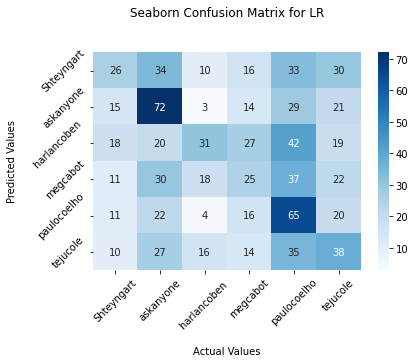

Precision and recall for NB


Username       Precision    Recall
-----------  -----------  --------
Shteyngart    0.00671141  0.111111
askanyone     0.201299    0.344444
harlancoben   0.0254777   0.190476
megcabot      0.027972    0.285714
paulocoelho   0.891304    0.165323
tejucole      0           0


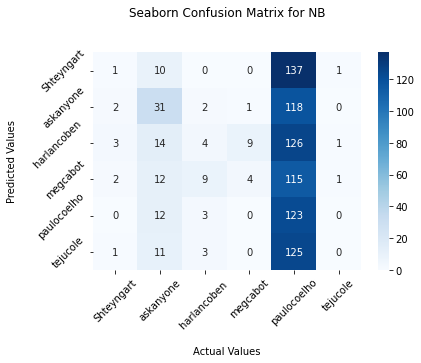

Precision and recall for ann


Username       Precision    Recall
-----------  -----------  --------
Shteyngart     0.367347   0.257143
askanyone      0.403974   0.365269
harlancoben    0.0844156  0.282609
megcabot       0.234043   0.268293
paulocoelho    0.448529   0.403974
tejucole       0.362319   0.294118


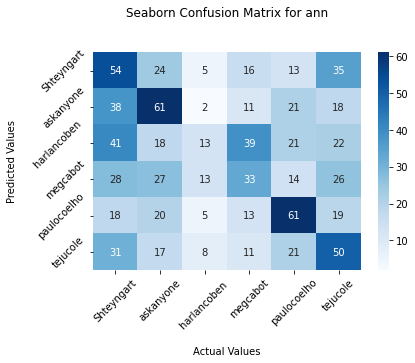

Precision and recall for dt


Username       Precision    Recall
-----------  -----------  --------
Shteyngart     0.167785   0.217391
askanyone      0.25974    0.408163
harlancoben    0.0127389  0.5
megcabot       0.188811   0.350649
paulocoelho    0.601449   0.250755
tejucole       0.471429   0.257812


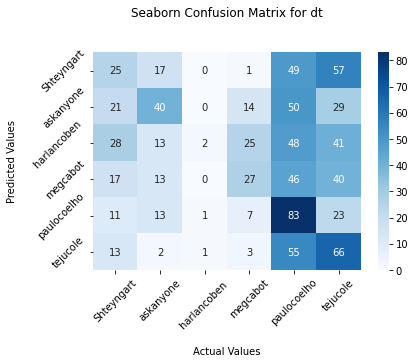

Precision and recall for rf


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.312925  0.261364
askanyone       0.407895  0.366864
harlancoben     0.245161  0.333333
megcabot        0.212766  0.241935
paulocoelho     0.459259  0.496
tejucole        0.416058  0.358491


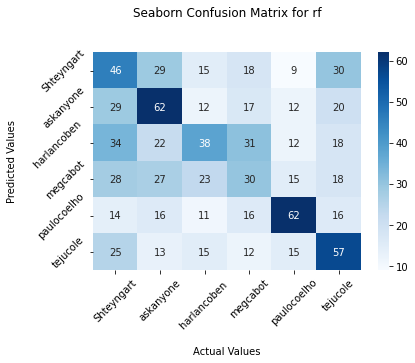

Precision and recall for svm


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.362416  0.271357
askanyone       0.396104  0.29902
harlancoben     0.203822  0.290909
megcabot        0.195804  0.245614
paulocoelho     0.405797  0.491228
tejucole        0.307143  0.307143


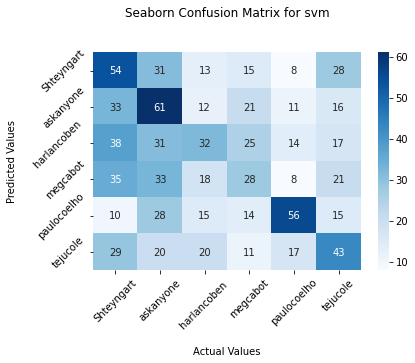

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [8]:
class_labels = ['Shteyngart', 'askanyone', 'harlancoben ', 'megcabot','paulocoelho', 'tejucole']

def print_precision_recall(cf_matrix):
  metrics = {"username":class_labels,"precision":[],"recall":[]}
  row_sum = np.sum(cf_matrix,axis=1)
  col_sum = np.sum(cf_matrix, axis=0)
  for i in range(len(class_labels)):
    metrics['precision'].append(cf_matrix[i,i]/row_sum[i]) 
    metrics['recall'].append(cf_matrix[i,i]/col_sum[i]) 
  print(tabulate(metrics,  headers=["Username","Precision","Recall"])) 

def plot_confusion_matrix(df_row):
  matrix_values = np.array(df_row.iloc[list(range(3,39))],dtype='i')
  cf_matrix = matrix_values.reshape(6, 6)

  print(f'Precision and recall for {df_row["Classifier-Code"]}\n\n')
  print_precision_recall(cf_matrix)

  ax = sns.heatmap(cf_matrix, fmt='g', annot=True, cmap='Blues')
  ax.set_title(f'Seaborn Confusion Matrix for {df_row["Classifier-Code"]}\n\n');
  ax.set_xlabel('\nActual Values')
  ax.set_ylabel('Predicted Values\n');
  ax.xaxis.set_ticklabels(class_labels,rotation=45)
  ax.yaxis.set_ticklabels(class_labels,rotation=45)
  ## Display the visualization of the Confusion Matrix.
  plt.show()

df2.apply(plot_confusion_matrix,axis=1)

## Evaluating for PCA output with grouping = 1

In [9]:
# read the csv file
pca_output_csv_df = pd.read_csv(path+"test-pca-output.csv")
pca_output_csv_df = pca_output_csv_df.astype({"cm": str})
# print number df rows and columns
#print(pca_output_csv_df.shape)
#print the column names
#print(pca_output_csv_df.columns)
print(pca_output_csv_df.info())
print()

pca_output_csv_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experiment-Number  30 non-null     int64  
 1   Grouping-Number    30 non-null     object 
 2   Balance-Code       30 non-null     object 
 3   Classifier-Code    30 non-null     object 
 4   Accuracy           30 non-null     float64
 5   Total-F1           30 non-null     float64
 6   cm                 30 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB
None



,Experiment-Number,Grouping-Number,Balance-Code,Classifier-Code,Accuracy,Total-F1,cm
0,1,G-1,s,ann,0.330306,1.965845,"[[54, 20, 12, 14, 14, 35, 38, 60, 7, 13, 19, 1..."
1,1,G-1,s,svm,0.311010,1.860313,"[[54, 31, 13, 15, 8, 28, 33, 61, 12, 21, 11, 1..."


In [10]:
## group the data by classifier-code and split-number
pca_grouped_df = pca_output_csv_df.groupby(['Experiment-Number','Classifier-Code','Grouping-Number','Balance-Code'])
pca_experiments_result = {
    'Experiment-Number':[],
    'Classifier-Code':[],
    'Grouping-Number':[],
    'Balance-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  pca_experiments_result[i] = []

for name, group in pca_grouped_df:
  pca_experiments_result['Experiment-Number'].append(name[0])
  pca_experiments_result['Classifier-Code'].append(name[1])
  pca_experiments_result['Grouping-Number'].append(name[2])
  pca_experiments_result['Balance-Code'].append(name[3])
  pca_experiments_result['Accuracy'].append(np.mean(group['Accuracy']))
  pca_experiments_result['Total-F1'].append(np.mean(group['Total-F1']))

  cm = convert_cm_to_confusion_matrix(group['cm'])
  for i in range(0,36):
    pca_experiments_result[i].append(cm[i])
  
#print(experiments_result)
print("PCA RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT")
pca_df = pd.DataFrame(pca_experiments_result)
display(pca_df)

PCA RESULT OF EACH CLASSIFIES FOR EACH EXPERIMENT


,Experiment-Number,Classifier-Code,Grouping-Number,Balance-Code,Accuracy,Total-F1,0,1,2,3,...,26,27,28,29,30,31,32,33,34,35
0,1,LR,G-1,s,0.287174,1.655048,40,32,6,12,...,4,16,61,17,19,26,12,11,32,40
1,1,NB,G-1,s,0.279228,1.483887,95,11,0,14,...,4,15,51,11,70,10,2,10,29,19
2,1,ann,G-1,s,0.330306,1.965845,54,20,12,14,...,13,8,60,19,26,10,18,13,18,55
3,1,dt,G-1,s,0.257662,1.483490,67,26,22,5,...,14,8,30,8,54,16,27,3,20,20
4,1,rf,G-1,s,0.353008,2.104661,53,23,14,16,...,12,22,54,16,32,17,12,9,13,57
5,1,svm,G-1,s,0.311010,1.860313,54,31,13,15,...,15,14,56,15,29,20,20,11,17,43
6,2,LR,G-1,s,0.287174,1.655048,40,32,6,12,...,4,16,61,17,19,26,12,11,32,40
7,2,NB,G-1,s,0.279228,1.483887,95,11,0,14,...,4,15,51,11,70,10,2,10,29,19
8,2,ann,G-1,s,0.330306,1.929281,45,24,13,23,...,5,10,65,17,16,17,9,22,22,54
9,2,dt,G-1,s,0.257662,1.483490,67,26,22,5,...,14,8,30,8,54,16,27,3,20,20


### Average Matrix for each classifier from 5 experiments

In [11]:
pca_class_grouped_df = pca_df[class_column].groupby(['Classifier-Code'])
pca_classifier_result = {
    'Classifier-Code':[],
    'Accuracy': [],
    'Total-F1': []
}
for i in range(0,36):
  pca_classifier_result[i] = []

for name, group in pca_class_grouped_df:
  pca_classifier_result['Classifier-Code'].append(name)
  pca_classifier_result['Accuracy'].append(np.mean(group['Accuracy']))
  pca_classifier_result['Total-F1'].append(np.mean(group['Total-F1']))
  for i in range(0,36):
    pca_classifier_result[i].append(int(np.mean(group[i])))

print("PCA RESULT OF EACH CLASSIFIER")
pca_df2 = pd.DataFrame(pca_classifier_result)
display(pca_df2)

PCA RESULT OF EACH CLASSIFIER


,Classifier-Code,Accuracy,Total-F1,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,LR,0.287174,1.655048,40,32,6,12,30,29,26,...,4,16,61,17,19,26,12,11,32,40
1,NB,0.279228,1.483887,95,11,0,14,20,9,59,...,4,15,51,11,70,10,2,10,29,19
2,ann,0.328717,1.925745,53,22,9,18,12,33,32,...,8,10,61,17,23,14,13,13,20,54
3,dt,0.257662,1.483490,67,26,22,5,12,17,53,...,14,8,30,8,54,16,27,3,20,20
4,rf,0.335528,2.001874,49,25,14,17,10,32,26,...,11,20,53,17,32,15,17,8,13,54
5,svm,0.311010,1.860313,54,31,13,15,8,28,33,...,15,14,56,15,29,20,20,11,17,43


### Precision, Recall,Confusion matrix for each classifier

PCA ANALYSIS


Precision and recall for LR


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.268456  0.258065
askanyone       0.435065  0.34715
harlancoben     0.133758  0.333333
megcabot        0.167832  0.230769
paulocoelho     0.442029  0.278539
tejucole        0.285714  0.272109


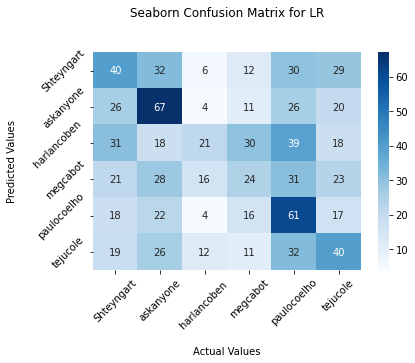

Precision and recall for NB


Username       Precision    Recall
-----------  -----------  --------
Shteyngart     0.637584   0.24359
askanyone      0.324675   0.434783
harlancoben    0.0191083  0.176471
megcabot       0.195804   0.25
paulocoelho    0.369565   0.294798
tejucole       0.135714   0.256757


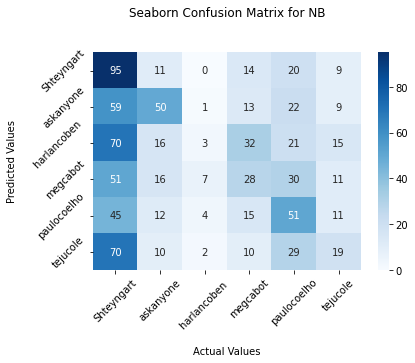

Precision and recall for ann


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.360544  0.278947
askanyone       0.437086  0.39759
harlancoben     0.168831  0.313253
megcabot        0.184397  0.236364
paulocoelho     0.451852  0.388535
tejucole        0.394161  0.339623


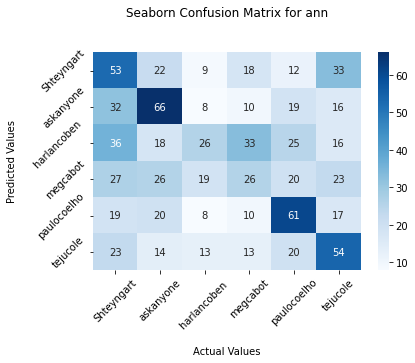

Precision and recall for dt


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.449664  0.2
askanyone       0.363636  0.343558
harlancoben     0.229299  0.251748
megcabot        0.125874  0.276923
paulocoelho     0.217391  0.326087
tejucole        0.142857  0.240964


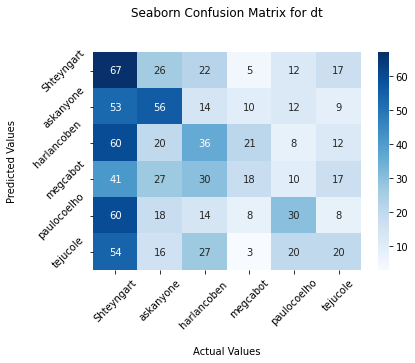

Precision and recall for rf


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.333333  0.276836
askanyone       0.460526  0.4
harlancoben     0.227273  0.324074
megcabot        0.232394  0.25
paulocoelho     0.389706  0.441667
tejucole        0.388489  0.341772


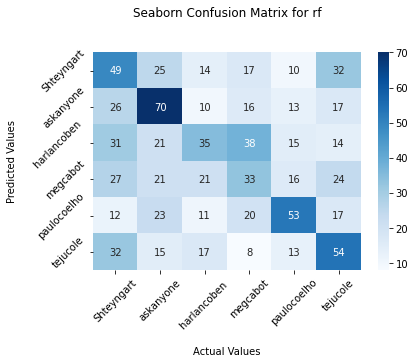

Precision and recall for svm


Username       Precision    Recall
-----------  -----------  --------
Shteyngart      0.362416  0.271357
askanyone       0.396104  0.29902
harlancoben     0.203822  0.290909
megcabot        0.195804  0.245614
paulocoelho     0.405797  0.491228
tejucole        0.307143  0.307143


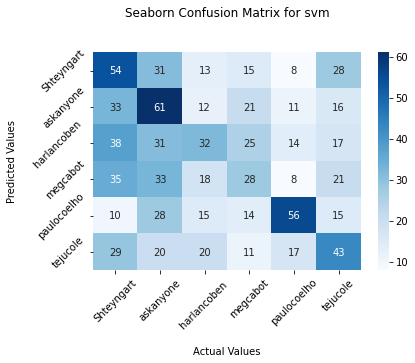

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [12]:
print("PCA ANALYSIS\n\n")
class_labels = ['Shteyngart', 'askanyone', 'harlancoben ', 'megcabot','paulocoelho', 'tejucole']
pca_df2.apply(plot_confusion_matrix,axis=1)